In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

### This is a project to to predict customer's churn
### Business decision is to keep more customers in touch with the company
### At the time, we don't know a lot about the features. Here is where problem analyzing will happen

In [2]:

df = pd.read_csv("../data/raw/churn.csv")
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


each row is data for each customer

each column if a feature of the data

the "churn" column is target and others are input data

the data is for the past of the customers

In [3]:
df.info()
df.describe(include="all")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,...,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043,7043
unique,7043,2,NaN,2,2,NaN,2,3,3,3,...,3,3,3,3,3,2,4,NaN,6531,2
top,7590-VHVEG,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,,No
freq,1,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,...,3095,3473,2810,2785,3875,4171,2365,NaN,11,5174
mean,NaN,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN,NaN
std,NaN,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN,NaN


## First impressions about the data
This is about 7 thousands of records which looks like a little dataset not so big

The dataset is seems to be a contract information of customers more than customers' behaviour

In [4]:
df['Churn'].value_counts()


Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [5]:
df['Churn'].value_counts(normalize=True)


Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64

In [6]:
df[['tenure', 'Churn']].head()


,tenure,Churn
0,1,No
1,34,No
2,2,Yes
3,45,No
4,2,Yes


In [7]:
df['tenure_group'] = pd.cut(
    df['tenure'],
    bins=[0, 12, 24, 36, 48, 60, 72],
    labels=['0-12', '12-24', '24-36', '36-48', '48-60', '60+']
)


In [8]:
churn_by_tenure = (
    df.groupby('tenure_group')['Churn']
    .value_counts(normalize=True)
    .unstack()
)

churn_by_tenure


/tmp/ipykernel_9018/3910958024.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('tenure_group')['Churn']


Churn,No,Yes
tenure_group,,
0-12,0.523218,0.476782
12-24,0.712891,0.287109
24-36,0.783654,0.216346
36-48,0.809711,0.190289
48-60,0.855769,0.144231
60+,0.933902,0.066098


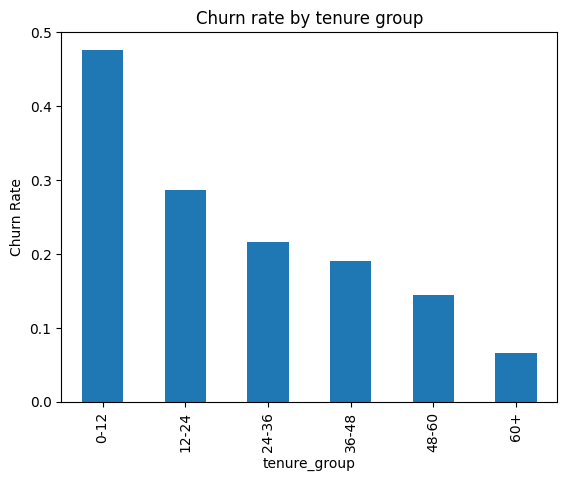

In [9]:
churn_by_tenure['Yes'].plot(kind='bar')
plt.ylabel('Churn Rate')
plt.title('Churn rate by tenure group')
plt.show()


In [9]:
df['tenure_group'] = pd.cut(
    df['tenure'],
    bins=[0, 12, 24, df['tenure'].max()],
    labels=['0-12', '12-24', '24+'],
    right=True
)


In [10]:
df['tenure_group'].value_counts()


tenure_group
24+      3833
0-12     2175
12-24    1024
Name: count, dtype: int64

In [11]:
df_24_plus = df[df['tenure_group'] == '24+']


In [12]:
df_24_plus['Contract'].value_counts(normalize=True)


Contract
Two year          0.400991
One year          0.300548
Month-to-month    0.298461
Name: proportion, dtype: float64

In [13]:
df_24_plus['PaymentMethod'].value_counts(normalize=True)


PaymentMethod
Bank transfer (automatic)    0.296895
Credit card (automatic)      0.291156
Electronic check             0.262718
Mailed check                 0.149230
Name: proportion, dtype: float64

In [14]:
df_24_plus['InternetService'].value_counts(normalize=True)


InternetService
Fiber optic    0.449778
DSL            0.348291
No             0.201931
Name: proportion, dtype: float64

In [15]:
df_24_plus['MonthlyCharges'].describe()


count    3833.000000
mean       70.612314
std        31.074053
min        18.250000
25%        45.450000
50%        79.150000
75%        96.900000
max       118.750000
Name: MonthlyCharges, dtype: float64

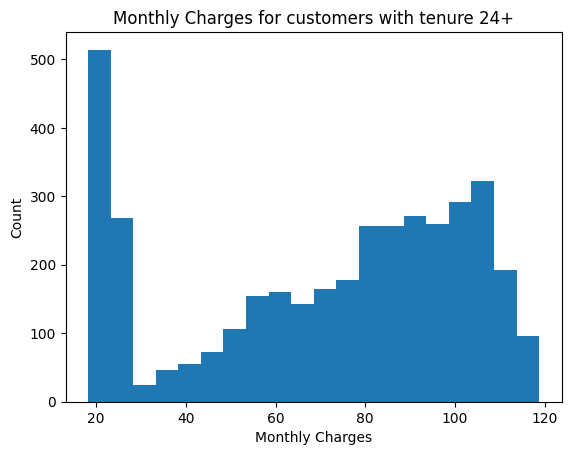

In [18]:
plt.hist(df_24_plus['MonthlyCharges'], bins=20)
plt.xlabel('Monthly Charges')
plt.ylabel('Count')
plt.title('Monthly Charges for customers with tenure 24+')
plt.show()


## Observations for customers with tenure 24+

- Most of them have ...
- Their dominant contract type is ...
- Payment method seems to be ...
- Monthly charges are generally ...


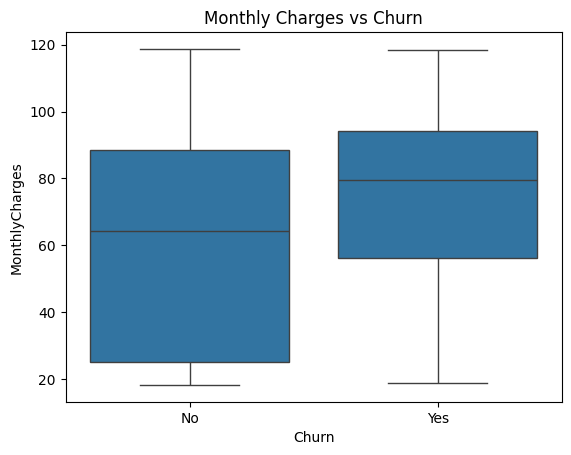

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=df, x="Churn", y="MonthlyCharges")
plt.title("Monthly Charges vs Churn")
plt.show()


In [17]:
pd.crosstab(df["Contract"], df["Churn"], normalize="index")


Churn,No,Yes
Contract,,
Month-to-month,0.572903,0.427097
One year,0.887305,0.112695
Two year,0.971681,0.028319


In [18]:
pd.crosstab(df["InternetService"], df["Churn"], normalize="index")


Churn,No,Yes
InternetService,,
DSL,0.810409,0.189591
Fiber optic,0.581072,0.418928
No,0.925950,0.074050


# Hypothesis: Who is at higher risk of churn?

Customers with contracts shorter than one year and without fiber optic service appear to be at higher risk of churn.

In [19]:
pd.crosstab(
    pd.cut(df['tenure'], bins=[0, 12, 24, 36, 48, 60, 72]),
    df['Churn'],
    normalize='index'
)


Churn,No,Yes
tenure,,
"(0, 12]",0.523218,0.476782
"(12, 24]",0.712891,0.287109
"(24, 36]",0.783654,0.216346
"(36, 48]",0.809711,0.190289
"(48, 60]",0.855769,0.144231
"(60, 72]",0.933902,0.066098


In [21]:
pd.crosstab(
    [df['Contract'], pd.cut(df['tenure'], bins=[0,12,24,72])],
    df['Churn'],
    normalize='index'
)


Churn                          No       Yes
Contract       tenure                      
Month-to-month (0, 12]   0.486459  0.513541
               (12, 24]  0.622795  0.377205
               (24, 72]  0.691434  0.308566
One year       (0, 12]   0.894309  0.105691
               (12, 24]  0.918782  0.081218
               (24, 72]  0.881076  0.118924
Two year       (0, 12]   1.000000  0.000000
               (12, 24]  1.000000  0.000000
               (24, 72]  0.968770  0.031230

مشتریانی که قرارداد ماهانه دارند، به دلیل نبود تعهد بلندمدت، با احتمال بیشتری شرکت را ترک می‌کنند.

In [37]:
df_tenure_month = df[
    (df['Contract'] == 'Month-to-month') &
    (df['tenure'] < 12)
]
# df_tenure_month
df_tenure_month['Churn'].value_counts(normalize=True)


Churn
Yes    0.519392
No     0.480608
Name: proportion, dtype: float64

In [47]:
pd.crosstab(df_tenure_month['PaymentMethod'], df_tenure_month['Churn'], normalize="index")


Churn,No,Yes
PaymentMethod,,
Bank transfer (automatic),0.510638,0.489362
Credit card (automatic),0.571429,0.428571
Electronic check,0.360960,0.639040
Mailed check,0.621578,0.378422


In [41]:
df_tenure_month.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'tenure_group'],
      dtype='object')

In [ ]:
bins =   [0,      12,     24,     36,     48,     60,     72]
labels = ['0-1y', '1-2y', '2-3y', '3-4y', '4-5y', '5y+']

df['tenure_bin'] = pd.cut(df['tenure'], bins=bins, labels=labels)


In [50]:
pd.crosstab(
    df['tenure_bin'],
    df['Churn'],
    normalize='index'
)


Churn,No,Yes
tenure_bin,,
0-1y,0.523218,0.476782
1-2y,0.712891,0.287109
2-3y,0.783654,0.216346
3-4y,0.809711,0.190289
4-5y,0.855769,0.144231
5y+,0.933902,0.066098


In [53]:
pd.crosstab(
    df['tenure_bin'],
    df['Churn'],
    normalize='index'
)


Churn,No,Yes
tenure_bin,,
0-1y,0.523218,0.476782
1-2y,0.712891,0.287109
2-3y,0.783654,0.216346
3-4y,0.809711,0.190289
4-5y,0.855769,0.144231
5y+,0.933902,0.066098


In [72]:
charge_min = df['MonthlyCharges'].min()
charge_max = df['MonthlyCharges'].max()


bins = [
    charge_min,
    charge_min + (charge_max - charge_min)/3,
    charge_min + 2*(charge_max - charge_min)/3,
    charge_max
]

labels = ['low', 'med', 'high']

df['MonthlyCharges_bin'] = pd.cut(df['MonthlyCharges'], bins=bins, labels=labels)
table = pd.crosstab(df['MonthlyCharges_bin'], df['Churn'], normalize='index')
# table.to_markdown()
table

Churn,No,Yes
MonthlyCharges_bin,,
low,0.835510,0.164490
med,0.695777,0.304223
high,0.663725,0.336275


In [73]:
df['MonthlyCharges_bin'] = pd.qcut(
    df['MonthlyCharges'],
    q=3,
    labels=['low', 'med', 'high']
)
table = pd.crosstab(df['MonthlyCharges_bin'], df['Churn'], normalize='index')
# table.to_markdown()
table

Churn,No,Yes
MonthlyCharges_bin,,
low,0.841344,0.158656
med,0.703198,0.296802
high,0.659139,0.340861


Customers with higher monthly charges show a higher probability of churn.
This suggests that pricing or perceived value might play a role in early customer dissatisfaction, especially in non long-term contracts.

In [76]:
table = pd.crosstab(
    [df['MonthlyCharges_bin'], df['Contract']],
    df['Churn'],
    normalize='index'
)

table.to_markdown()
# table

"|                            |       No |        Yes |\n|:---------------------------|---------:|-----------:|\n| ('low', 'Month-to-month')  | 0.700086 | 0.299914   |\n| ('low', 'One year')        | 0.960499 | 0.039501   |\n| ('low', 'Two year')        | 0.990182 | 0.00981767 |\n| ('med', 'Month-to-month')  | 0.557772 | 0.442228   |\n| ('med', 'One year')        | 0.909091 | 0.0909091  |\n| ('med', 'Two year')        | 0.976077 | 0.0239234  |\n| ('high', 'Month-to-month') | 0.473892 | 0.526108   |\n| ('high', 'One year')       | 0.799615 | 0.200385   |\n| ('high', 'Two year')       | 0.945035 | 0.0549645  |"

In [ ]:
df['contract_charge'] = (
    df['Contract'].astype(str) + '_' +
    df['MonthlyCharges_bin'].astype(str)
)
# df['contract_charge']

0       Month-to-month_low
1             One year_med
2       Month-to-month_med
3             One year_low
4       Month-to-month_med
               ...        
7038         One year_high
7039         One year_high
7040    Month-to-month_low
7041    Month-to-month_med
7042         Two year_high
Name: contract_charge, Length: 7043, dtype: object

In [81]:
table = pd.crosstab(df['contract_charge'], df['Churn'], normalize='index')
# table.to_markdown()
table

Churn,No,Yes
contract_charge,,
Month-to-month_high,0.473892,0.526108
Month-to-month_low,0.700086,0.299914
Month-to-month_med,0.557772,0.442228
One year_high,0.799615,0.200385
One year_low,0.960499,0.039501
One year_med,0.909091,0.090909
Two year_high,0.945035,0.054965
Two year_low,0.990182,0.009818
Two year_med,0.976077,0.023923
